In [1]:
from IPython import get_ipython
get_ipython().magic('reset -sf')
from sklearn.metrics import accuracy_score
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import math
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor

In [2]:
import seaborn as sb


In [3]:
xl = pd.ExcelFile(r'C:\Users\saika\Desktop\cars24\data.xlsx')
print(xl.sheet_names)

['fields summary', 'data']


In [4]:
df1 = pd.read_excel(r'C:\Users\saika\Desktop\cars24\data.xlsx', sheet_name='data')
df = df1.copy()

In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 73 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   appointmentId                                              26307 non-null  object        
 1   inspectionStartTime                                        26307 non-null  datetime64[ns]
 2   year                                                       26307 non-null  int64         
 3   month                                                      26307 non-null  int64         
 4   engineTransmission_battery_value                           26307 non-null  object        
 5   engineTransmission_battery_cc_value_0                      3438 non-null   object        
 6   engineTransmission_battery_cc_value_1                      430 non-null    object        
 7   engineTransmission_battery_cc_v

(26307, 73)

In [6]:
df['rating_engineTransmission'].unique()


array([3. , 4. , 3.5, 4.5, 5. , 1. , 2. , 2.5, 1.5, 0.5])

In [87]:
df['rating_engineTransmission'].nunique()

10

In [88]:
df.describe()

,year,month,engineTransmission_engineOil_cc_value_9,odometer_reading,rating_engineTransmission,inspectionStartYear,inspectionStartMonth,eng_age,Leaking,Dirty,Level Low,Leakage from Turbo Charger,Leakage from Tappet Cover,Leakage from Side cover,Leakage from Sump/chamber,Low Pressure warning light glowing,Mixed with Coolant,Alternator Brg Noise,Timing Noise,Tappet Noise,Injector Noise,Engine Auxiliary Noise,Whistling Noise-Turbo,Water Pump Brg Noise,Repaired,RPM fluctuating,MIL light glowing,Misfiring,RPM not increasing,Fuel Leakage From Injector,Not converting to CNG,Sump Damaged,Over heating,Turbo charger not working,Seized,Car not working on Petrol,Weak,Changed,Discharging light glowing,Not Working,Jump Start,Spongy,Hard,Low Pick Up,Slip,Bearing Noise,Auto Transmission Not Satisfactory,Burning,coolant_Leaking,coolant_Dirty,coolant_Radiator Damaged,coolant_Mixed with Engine Oil,Gear_Automatic Transmission not working properly,Gear_Not Engaging,Gear_Hard,Gear_Abnormal Noise
count,26307.000000,26307.000000,0.0,26307.000000,26307.000000,26307.0,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000,26307.000000
mean,2010.856578,5.462006,NaN,76460.143764,3.624663,2019.0,2.335728,81.785570,0.379329,0.535713,0.104117,0.031322,0.260577,0.197020,0.097731,0.003383,0.002965,0.157639,0.455468,0.558977,0.072794,0.224503,0.064051,0.052458,0.149200,0.135781,0.109210,0.198502,0.010111,0.024062,0.009959,0.010453,0.022808,0.003155,0.000912,0.005208,0.117725,0.010568,0.001787,0.004219,0.016231,0.176683,0.284525,0.114950,0.033755,0.027141,0.004790,0.007184,0.116357,0.346676,0.013685,0.003839,0.003953,0.013228,0.090052,0.056259
std,3.766234,3.583866,NaN,46762.524489,0.847645,0.0,1.039384,52.173031,0.485229,0.498732,0.305418,0.174191,0.438958,0.397755,0.296956,0.058067,0.054372,0.364409,0.498022,0.496519,0.259804,0.417263,0.244849,0.222952,0.356292,0.342563,0.311909,0.398880,0.100048,0.153245,0.099300,0.101708,0.149293,0.056082,0.030191,0.071978,0.322289,0.102256,0.042231,0.064821,0.126367,0.381407,0.451196,0.318968,0.180602,0.162497,0.069042,0.084457,0.320658,0.475920,0.116180,0.061844,0.062752,0.114254,0.286262,0.230425
min,1989.000000,1.000000,NaN,1.000000,0.500000,2019.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,2.000000,NaN,46396.000000,3.500000,2019.0,1.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2011.000000,5.000000,NaN,72013.000000,4.000000,2019.0,2.000000,85.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [7]:
df.head(100)

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOilLevelDipstick_cc_value_0,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engineOil_cc_value_3,engineTransmission_engineOil_cc_value_4,engineTransmission_engineOil_cc_value_5,engineTransmission_engineOil_cc_value_6,engineTransmission_engineOil_cc_value_7,engineTransmission_engineOil_cc_value_8,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,engineTransmission_engine_cc_value_1,engineTransmission_engine_cc_value_2,engineTransmission_engine_cc_value_3,engineTransmission_engine_cc_value_4,engineTransmission_engine_cc_value_5,engineTransmission_engine_cc_value_6,engineTransmission_engine_cc_value_7,engineTransmission_engine_cc_value_8,engineTransmission_engine_cc_value_9,engineTransmission_engine_cc_value_10,engineTransmission_coolant_value,engineTransmission_coolant_cc_value_0,engineTransmission_coolant_cc_value_1,engineTransmission_coolant_cc_value_2,engineTransmission_coolant_cc_value_3,engineTransmission_engineMounting_value,engineTransmission_engineMounting_cc_value_0,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_engineSound_cc_value_2,engineTransmission_engineSound_cc_value_3,engineTransmission_engineSound_cc_value_4,engineTransmission_engineSound_cc_value_5,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_clutch_cc_value_1,engineTransmission_clutch_cc_value_2,engineTransmission_clutch_cc_value_3,engineTransmission_clutch_cc_value_4,engineTransmission_clutch_cc_value_5,engineTransmission_clutch_cc_value_6,engineTransmission_gearShifting_value,engineTransmission_gearShifting_cc_value_0,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-02-03 15:43:48,2008,8,No,Weak,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,NaN,NaN,NaN,NaN,NaN,NaN,No,Repaired,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Water Pump Brg Noise,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,No,White,No,Back Compression Exist,No,Spongy,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0
1,aj_02,2019-01-16 13:02:12,2007,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,Leakage from Sump/chamber,NaN,NaN,NaN,NaN,NaN,No,RPM fluctuating,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,Yes,NaN,No,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,NaN,NaN,No,Noise from silencer assembly,Yes,NO Blow-by,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0
2,aj_03,2019-02-09 13:31:04,2012,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Dirty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Dirty,NaN,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Engine Auxiliary Noise,NaN,NaN,NaN,NaN,No,Black,Yes,Perm. Blow By on idle,No,Hard,S

In [9]:
df['inspectionStartTime'].head()


0   2019-02-03 15:43:48
1   2019-01-16 13:02:12
2   2019-02-09 13:31:04
3   2019-01-18 11:02:53
4   2019-01-27 12:12:06
Name: inspectionStartTime, dtype: datetime64[ns]

In [10]:
df['inspectionStartYear'] = df['inspectionStartTime'].dt.year
df['inspectionStartMonth'] = df['inspectionStartTime'].dt.month

Text(0, 0.5, 'Frequency')

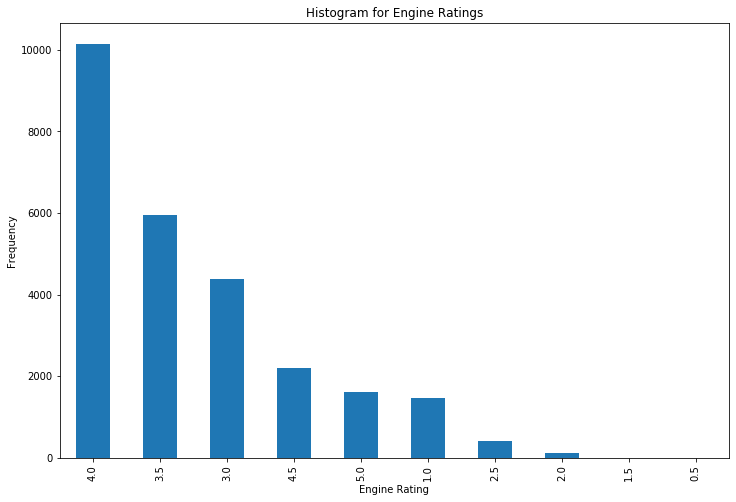

In [89]:
ax = df['rating_engineTransmission'].value_counts().plot(kind='bar',figsize=(12,8), title="Histogram for Engine Ratings")
ax.set_xlabel("Engine Rating")
ax.set_ylabel("Frequency")

In [11]:
# Calcualting Age of Engine at the time of inspection based on year and month bought
def engine_Age(y1,m1,y2,m2):
    a = 0
    if m2>m1:
        a = ((y1-y2)-1)*12 + ((12+m1)-m2)
    if m1>m2:
        a = (y1-y2)*12 + (m1-m2)
    return a

In [12]:
df['eng_age'] = df.apply(lambda x: engine_Age(x['inspectionStartYear'], x['inspectionStartMonth'], x['year'], x['month']),axis=1)


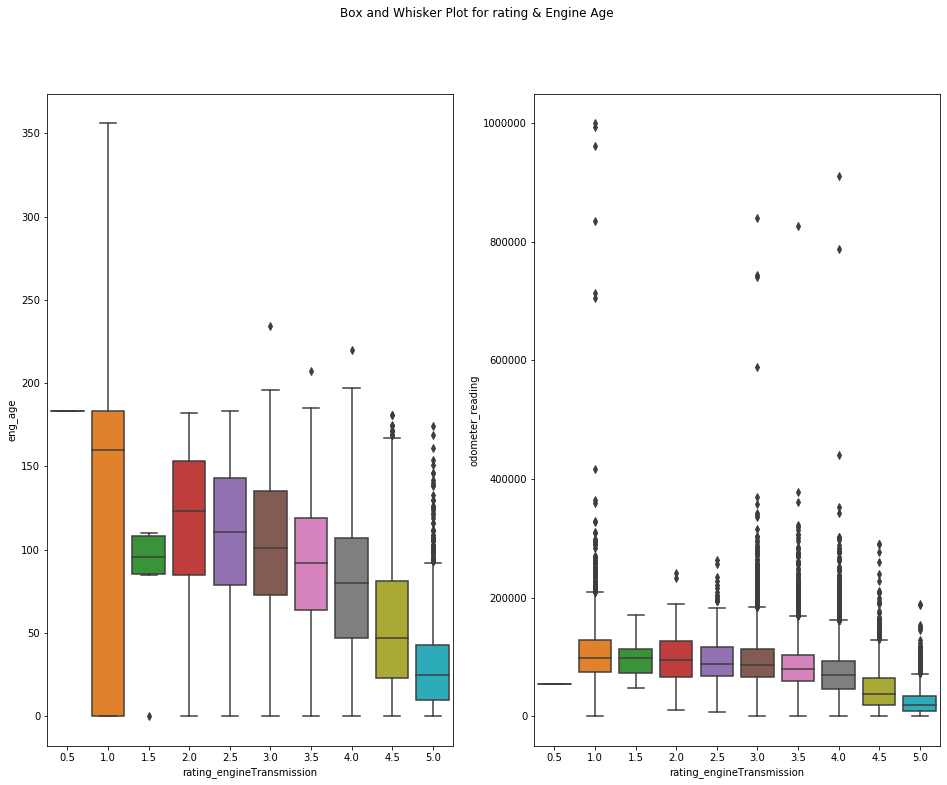

In [14]:
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
sb.boxplot(x='rating_engineTransmission', y='eng_age', data=df,ax =ax1)
sb.boxplot(x='rating_engineTransmission', y='odometer_reading', data=df, ax=ax2)

plt.suptitle('Box and Whisker Plot for rating & Engine Age ')
plt.savefig('Box1.jpg', dpi=300, bbox_inches = "tight")

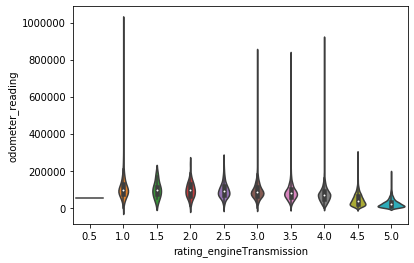

In [15]:
sb.violinplot(df['rating_engineTransmission'], df['odometer_reading'])

In [16]:

#df['fuel_type'].apply(pd.value_counts).plot(kind='pie',figsize=(12,8), title="Pie Chart indicating Frequency of Fuel-type", subplots=True)



In [17]:
df['engineTransmission_engineOil_cc_value_0'].value_counts()

Leaking                               7892
Dirty                                 6906
Level Low                             2739
Leakage from Tappet Cover              716
Leakage from Side cover                221
Leakage from Sump/chamber               50
Leakage from Turbo Charger              31
Low Pressure warning light glowing       1
Mixed with Coolant                       1
Name: engineTransmission_engineOil_cc_value_0, dtype: int64

In [18]:
df['engineTransmission_engineOil_cc_value_0'].head(10)

0      Leaking
1      Leaking
2        Dirty
3        Dirty
4      Leaking
5          NaN
6        Dirty
7          NaN
8    Level Low
9        Dirty
Name: engineTransmission_engineOil_cc_value_0, dtype: object

In [19]:
TransOil = ["engineTransmission_engineOil_cc_value_0", "engineTransmission_engineOil_cc_value_1", "engineTransmission_engineOil_cc_value_2", "engineTransmission_engineOil_cc_value_3", "engineTransmission_engineOil_cc_value_4","engineTransmission_engineOil_cc_value_5",
"engineTransmission_engineOil_cc_value_6","engineTransmission_engineOil_cc_value_7","engineTransmission_engineOil_cc_value_8"]

In [20]:
for i in range(0,len(TransOil)):
    df[TransOil[i]].fillna('None',inplace = True)

In [21]:
list1 = df['engineTransmission_engineOil_cc_value_0'].unique().tolist()


In [22]:
print(list1)

['Leaking', 'Dirty', 'None', 'Level Low', 'Leakage from Turbo Charger', 'Leakage from Tappet Cover', 'Leakage from Side cover', 'Leakage from Sump/chamber', 'Low Pressure warning light glowing', 'Mixed with Coolant']


In [23]:

for i in range(0,len(list1)):
    df[list1[i]] = [1 if x0== list1[i] or x1== list1[i] or x2 == list1[i] or x3 == list1[i] or x4== list1[i] or x5 == list1[i] 
                or x6 == list1[i] or x7== list1[i] or x8 == list1[i] else 0 for x0,x1,x2,x3,x4,x5,x6,x7,x8 in 
            zip(df[TransOil[0]], df[TransOil[1]], df[TransOil[2]],df[TransOil[3]]
                ,df[TransOil[4]],df[TransOil[5]], df[TransOil[6]], df[TransOil[7]],df[TransOil[8]])]



In [24]:
df.drop(TransOil, axis = 1,inplace =True)

In [25]:
df.drop(['None'],axis =1, inplace = True)

In [26]:
EngSound =['engineTransmission_engineSound_cc_value_0','engineTransmission_engineSound_cc_value_1','engineTransmission_engineSound_cc_value_2','engineTransmission_engineSound_cc_value_3','engineTransmission_engineSound_cc_value_4','engineTransmission_engineSound_cc_value_5']

In [27]:
for i in range(0,len(EngSound)):
    df[EngSound[i]].fillna('None',inplace = True)

In [28]:
list2 = df['engineTransmission_engineSound_cc_value_0'].unique().tolist()


In [29]:
print(list2)

['Alternator Brg Noise', 'Timing Noise', 'None', 'Tappet Noise', 'Injector Noise', 'Engine Auxiliary Noise', 'Whistling Noise-Turbo', 'Water Pump Brg Noise']


In [30]:
for i in range(0,len(list2)):
    df[list2[i]] = [1 if x0== list2[i] or x1== list2[i] or x2 == list2[i] or x3 == list2[i] or x4== list2[i] or x5 == list2[i] 
             else 0 for x0,x1,x2,x3,x4,x5 in 
            zip(df[EngSound[0]], df[EngSound[1]], df[EngSound[2]],df[EngSound[3]]
                ,df[EngSound[4]],df[EngSound[5]])]

In [31]:
df.drop(EngSound, axis = 1,inplace =True)
df.drop(['None'],axis =1, inplace = True)

In [32]:
TransEng =['engineTransmission_engine_cc_value_0','engineTransmission_engine_cc_value_1','engineTransmission_engine_cc_value_2','engineTransmission_engine_cc_value_3','engineTransmission_engine_cc_value_4','engineTransmission_engine_cc_value_5','engineTransmission_engine_cc_value_6','engineTransmission_engine_cc_value_7','engineTransmission_engine_cc_value_8','engineTransmission_engine_cc_value_9','engineTransmission_engine_cc_value_10']

In [33]:
for i in range(0,len(TransEng)):
    df[TransEng[i]].fillna('None',inplace = True)

In [34]:
list3 = df['engineTransmission_engine_cc_value_0'].unique().tolist()
for i in range(0,len(list3)):
    df[list3[i]] = [1 if x0== list3[i] or x1== list3[i] or x2 == list3[i] or x3 == list3[i] or x4== list3[i] or x5 == list3[i] 
                or x6 == list3[i] or x7== list3[i] or x8 == list3[i] or x9== list3[i] or x10 == list3[i] else 0 for x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10 in 
            zip(df[TransEng[0]], df[TransEng[1]], df[TransEng[2]],df[TransEng[3]]
                ,df[TransEng[4]],df[TransEng[5]], df[TransEng[6]], df[TransEng[7]],
                df[TransEng[8]],df[TransEng[9]],df[TransEng[10]])]

In [35]:
df.drop(TransEng, axis = 1,inplace =True)
df.drop(['None'],axis =1, inplace = True)

In [36]:
Battery = ['engineTransmission_battery_cc_value_0','engineTransmission_battery_cc_value_1','engineTransmission_battery_cc_value_2',
           'engineTransmission_battery_cc_value_3','engineTransmission_battery_cc_value_4']

In [37]:
for i in range(0,len(Battery)):
    df[Battery[i]].fillna('None',inplace = True)
list4 = df['engineTransmission_battery_cc_value_0'].unique().tolist()
for i in range(0,len(list4)):
    df[list4[i]] = [1 if x0== list4[i] or x1== list4[i] or x2 == list4[i] or x3 == list4[i] or x4== list4[i] 
             else 0 for x0,x1,x2,x3,x4 in 
            zip(df[Battery[0]], df[Battery[1]], df[Battery[2]],df[Battery[3]]
                ,df[Battery[4]])]

In [38]:
df.drop(Battery, axis = 1,inplace =True)
df.drop(['None'],axis =1, inplace = True)

In [39]:
clutch = ['engineTransmission_clutch_cc_value_0','engineTransmission_clutch_cc_value_1',
          'engineTransmission_clutch_cc_value_2','engineTransmission_clutch_cc_value_3','engineTransmission_clutch_cc_value_4',
          'engineTransmission_clutch_cc_value_5']
for i in range(0,len(clutch)):
    df[clutch[i]].fillna('None',inplace = True)
list5 = df['engineTransmission_clutch_cc_value_0'].unique().tolist()


In [40]:
for i in range(0,len(list5)):
    df[list5[i]] = [1 if x0== list5[i] or x1== list5[i] or x2 == list5[i] or x3 == list5[i] or x4== list5[i] or x5 == list5[i] 
             else 0 for x0,x1,x2,x3,x4,x5 in 
            zip(df[clutch[0]], df[clutch[1]], df[clutch[2]],df[clutch[3]]
                ,df[clutch[4]],df[clutch[5]])]

In [41]:
df.drop(clutch, axis = 1,inplace =True)
df.drop(['None'],axis =1, inplace = True)

In [42]:
coolant = ['engineTransmission_coolant_cc_value_0','engineTransmission_coolant_cc_value_1',
           'engineTransmission_coolant_cc_value_2','engineTransmission_coolant_cc_value_3']
for i in range(0,len(coolant)):
    df[coolant[i]].fillna('None',inplace = True)
list6 = df['engineTransmission_coolant_cc_value_0'].unique().tolist()

In [43]:
print(list6)

['Leaking', 'Dirty', 'None', 'Radiator Damaged', 'Mixed with Engine Oil']


In [44]:
for i in range(0,len(list6)):
    df["coolant_"+list6[i]] = [1 if x0== list6[i] or x1== list6[i] or x2 == list6[i] or x3 == list6[i]  
             else 0 for x0,x1,x2,x3 in 
            zip(df[coolant[0]], df[coolant[1]], df[coolant[2]],df[coolant[3]])]

In [45]:
df.drop(coolant, axis = 1,inplace =True)

In [46]:

df.drop(['coolant_None'],axis =1, inplace = True)

In [47]:
gearShift = ['engineTransmission_gearShifting_cc_value_0', 'engineTransmission_gearShifting_cc_value_1', 
             'engineTransmission_gearShifting_cc_value_2']
for i in range(0,len(gearShift)):
    df[gearShift[i]].fillna('None',inplace = True)
list7 = df['engineTransmission_gearShifting_cc_value_0'].unique().tolist()

In [48]:
print(list7)

['None', 'Automatic Transmission not working properly', 'Not Engaging', 'Hard', 'Abnormal Noise']


In [49]:
for i in range(0,len(list7)):
    df["Gear_"+list7[i]] = [1 if x0== list7[i] or x1== list7[i] or x2 == list7[i]   
             else 0 for x0,x1,x2 in 
            zip(df[gearShift[0]], df[gearShift[1]], df[gearShift[2]])]

In [50]:
df.drop(gearShift, axis = 1,inplace =True)
df.drop(['Gear_None'],axis =1, inplace = True)

In [51]:
Others = ['engineTransmission_exhaustSmoke_cc_value_0','engineTransmission_engineBlowByBackCompression_cc_value_0'
          ,'engineTransmission_engineMounting_cc_value_0', 'engineTransmission_engineOilLevelDipstick_cc_value_0','fuel_type']


dummy1= pd.get_dummies(df, columns = Others, drop_first=True)


In [52]:
dummy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 91 columns):
 #   Column                                                                                          Non-Null Count  Dtype         
---  ------                                                                                          --------------  -----         
 0   appointmentId                                                                                   26307 non-null  object        
 1   inspectionStartTime                                                                             26307 non-null  datetime64[ns]
 2   year                                                                                            26307 non-null  int64         
 3   month                                                                                           26307 non-null  int64         
 4   engineTransmission_battery_value                                                              

In [53]:
dummy2 = dummy1.copy()
cols = [*range(0, 21, 1)]
dummy2.drop(dummy2.columns[cols],axis=1,inplace=True)

In [54]:
dummy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 70 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   engineTransmission_comments_value_4                                                             14 non-null     object 
 1   odometer_reading                                                                                26307 non-null  int64  
 2   rating_engineTransmission                                                                       26307 non-null  float64
 3   inspectionStartYear                                                                             26307 non-null  int64  
 4   inspectionStartMonth                                                                            26307 non-null  int64  
 5   eng_age    

In [55]:
y = dummy2['rating_engineTransmission']


cols2 = [0,3,4] # need to remove
dummy2.drop(dummy2.columns[cols2],axis=1,inplace=True)


In [56]:
dummy2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 67 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   odometer_reading                                                                                26307 non-null  int64  
 1   rating_engineTransmission                                                                       26307 non-null  float64
 2   eng_age                                                                                         26307 non-null  int64  
 3   Leaking                                                                                         26307 non-null  int64  
 4   Dirty                                                                                           26307 non-null  int64  
 5   Level Low  

Text(0.5, 1, 'Heatmap using Pearson Correlation for features')

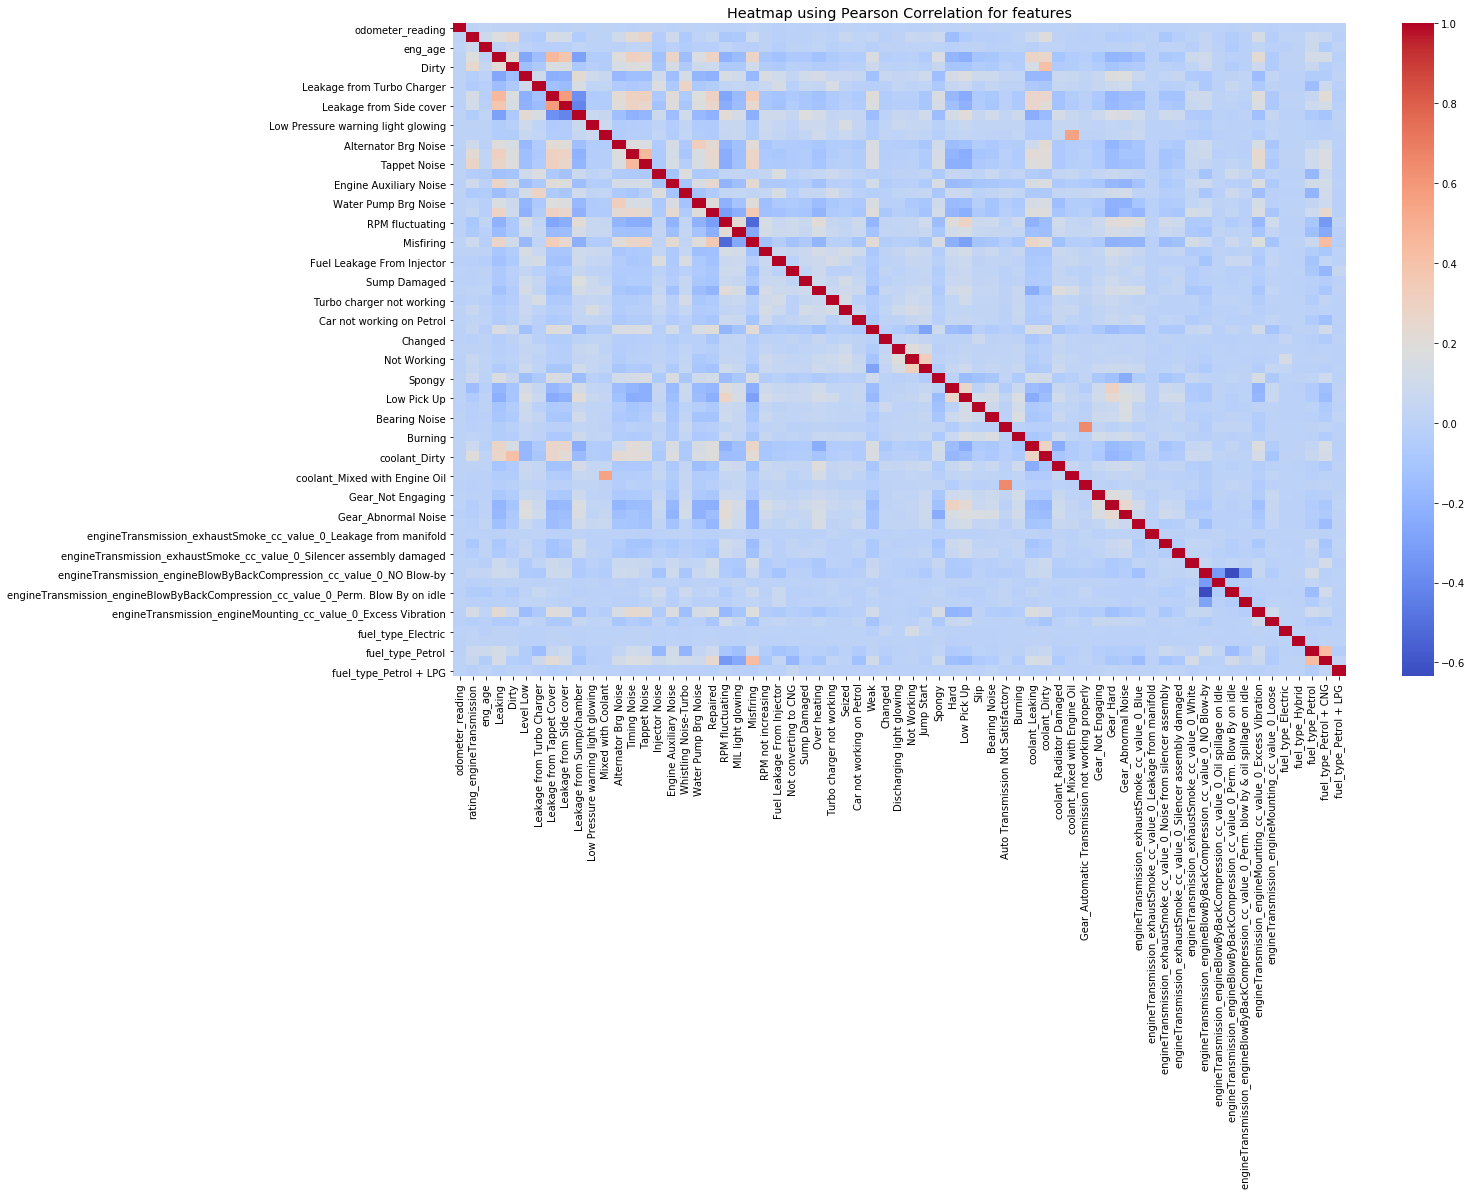

In [57]:
_, ax = plt.subplots(1, figsize=(20, 12))
sb.heatmap(dummy2.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson'), ax=ax, cmap='coolwarm')

ax.set_title('Heatmap using Pearson Correlation for features', size='x-large') #annot =True for correlation values

In [58]:
dummy2.describe()
dummy3 = dummy2.copy()

In [59]:
 dummy3.drop(['rating_engineTransmission'],axis =1, inplace = True)

In [62]:
from scipy.stats import pearsonr
target = y
corr, _ = pearsonr(dummy2['odometer_reading'],target )
print('Pearsons correlation between odometer and engine rating: %.3f' % corr)

Pearsons correlation between odometer and engine rating: -0.363


In [65]:
dummy3.shape

(26307, 66)

In [66]:
y.shape

(26307,)

In [68]:
x= dummy3

In [69]:
Scoring = 'neg_mean_squared_error'
seed = 7
num_folds = 10
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size = 0.3, shuffle=True, random_state=None)
print (Xtrain.shape, Ytrain.shape)
print (Xtest.shape, Ytest.shape)

(18414, 66) (18414,)
(7893, 66) (7893,)


In [70]:
# Spot Check Algorithms
algos = []
algos.append(('LR', LinearRegression()))
algos.append(('LASSO', Lasso()))
algos.append(('EN', ElasticNet()))
algos.append(('KNN', KNeighborsRegressor()))
algos.append(('CART', DecisionTreeRegressor()))
algos.append(('SVR', SVR()))

In [71]:
# Standardize the dataset
Pipelines = []
Pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
Pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
Pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
Pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
Pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
Pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
out = []
Names = []
for Name, algos in Pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
	cv_results = cross_val_score(algos, Xtrain, Ytrain, cv=kfold, scoring=Scoring)
	out.append(cv_results)
	Names.append(Name)
	msg = "%s: %f (%f)" % (Name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledLR: -0.535576 (0.027744)
ScaledLASSO: -0.715390 (0.033183)
ScaledEN: -0.715390 (0.033183)
ScaledKNN: -0.311776 (0.019296)
ScaledCART: -0.472209 (0.016124)
ScaledSVR: -0.352549 (0.021832)


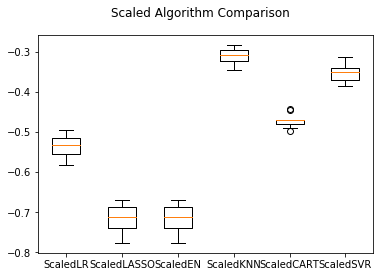

In [72]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(out)
ax.set_xticklabels(Names)
pyplot.show()

In [75]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
out = []
names = []

In [76]:
for name, algos in ensembles:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
	cv_results = cross_val_score(algos, Xtrain, Ytrain, cv=kfold, scoring=Scoring)
	out.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


ScaledAB: -0.438618 (0.017014)
ScaledGBM: -0.328052 (0.021353)
ScaledRF: -0.259270 (0.017723)
ScaledET: -0.270393 (0.014978)


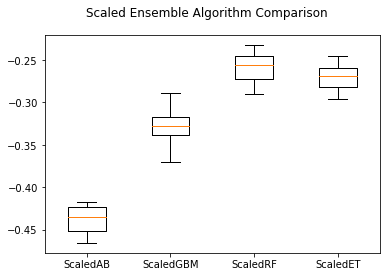

In [77]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(out)
ax.set_xticklabels(names)
pyplot.show()

In [79]:
# Tune scaled GBM
scaler = StandardScaler().fit(Xtrain)
rescaleX = scaler.transform(Xtrain)
param_grid = dict(n_estimators=np.array([400,500]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=Scoring, cv=kfold)
grid_result = grid.fit(rescaleX, Ytrain)

C:\Users\saika\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [80]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.284019 using {'n_estimators': 500}
-0.287563 (0.017232) with: {'n_estimators': 400}
-0.284019 (0.016593) with: {'n_estimators': 500}


In [83]:
# Make predictions on validation dataset

# prepare the model
scaler = StandardScaler().fit(Xtrain)
rescaleX = scaler.transform(Xtrain)
model = GradientBoostingRegressor(random_state=seed, n_estimators=500)
model.fit(rescaleX, Ytrain)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [85]:
# transform the validation dataset
from sklearn.metrics import mean_squared_error
rescaledValidationX = scaler.transform(Xtest)
predictions = model.predict(rescaledValidationX)
print(mean_squared_error(Ytest, predictions))

0.2870513296915836


In [86]:
# Save the model
from sklearn.externals import joblib
model_filename = 'GradBoost.pkl'
print("Saving model to {}...".format(model_filename))
joblib.dump(model, model_filename)

Saving model to GradBoost.pkl...


C:\Users\saika\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['GradBoost.pkl']

# Outlier detection : Classification based 

In [90]:
y_out1 = dummy3[dummy3['odometer_reading']<220000]# based on odemeter or engine age..
y_out2 = dummy3[dummy3['eng_age']<230]
# USe the X variables from generated above for prediction.